# **지능형 IoT 응용**
#### 한국기술교육대학교 컴퓨터공학부 스마트 IoT 트랙


---


# 02. 신경망 기초 - 퍼셉트론(Perceptron) 및 다층 퍼셉트론 (Multi-Layer Perceptron)

---

### Acknowledgement


이 자료는 다음 서적의 내용을 바탕으로 작성되었음
- 밑바닥부터 시작하는 딥러닝 (Deep Learning from Scratch), 사이토 고키 지음, 개잎맵시 옮김, 한빛미디어
- 모두의 딥러닝 (개정2판), 조태호 지음, 길벗

---

### 2.1 퍼셉트론 (Perceptron)

- 신경망(인공 신경망, Artificial Neural Network, ANN)의 기원이되는 알고리즘
  - 프랑크 로젠블라트가 1957년 고안한 알고리즘
- 다수의 신호를 입력으로 받아 하나의 신호를 출력

<img src="./02.신경망_기초/02-1.perceptron.png" width="20%" height="20%">

- 입력으로 2개의 신호를 받는 퍼셉트론의 예
  - x1, x2: 입력 신호
  - y:      출력 신호
  - w1, w2: 가중치 (weight)
  - 그림의 원: 뉴런(노드)

- 퍼셉트론 동작 원리
  - 입력 신호가 뉴런에 입력될 때 각각 가중치가 곱해짐
  - 가중치는 각 신호가 결과에 주는 영향력을 조절하는 요소로 작용 (가중치가 클수록 해당 신호가 그만큼 더 중요함을 의미)
  - 뉴런에서 보내온 신호의 총합이 정해진 임계값(theta)을 넘을 때만 1을 출력 ('뉴런이 활성화한다'라고 표현하기도 함)
 
 
 <img src="./02.신경망_기초/02-2.perceptron-equation.png" width="30%" height="30%">
 

### 2.2 퍼셉트론을 이용한 논리 회로 표현



#### 2.2.1 AND 게이트

| x1 | x2 | y |
|----|----|---|
| 0 | 0 | 0 |
| 1 | 0 | 0 |
| 0 | 1 | 0 |
| 1 | 1 | 1 |

- AND 게이트를 퍼셉트론으로 표현하려면?
  - AND 게이트의 진리표대로 작동하도록 하는 w1, w2, theta의 값을 정하는 것이 필요
  - (0.5, 0.5, 0.7) 혹은 (0.5, 0.5, 0.8) 혹은 (0.4, 0.6, 0.9)
  - 매개변수를 위와 같이 설정하면 x1과 x2 모두 1일 때만 가중 신호의 총합이 주어진 임계값을 넘게 됨
  - 가능한 다른 값은?? 가능한 매개변수 값 조합은 얼마나 있을까?

#### 2.2.2 NAND 게이트

| x1 | x2 | y |
|----|----|---|
| 0 | 0 | 1 |
| 1 | 0 | 1 |
| 0 | 1 | 1 |
| 1 | 1 | 0 |

- NAND는 Not AND를 의미
- AND 게이트의 출력을 뒤집은 것
- NAND 게이트를 표현할 수 있는 매개변수 값은?
  - (-0.5, -0.5, -0.7)
  - 다른 가능한 조합은?

#### 2.2.3 OR 게이트

| x1 | x2 | y |
|----|----|---|
| 0 | 0 | 0 |
| 1 | 0 | 1 |
| 0 | 1 | 1 |
| 1 | 1 | 1 |

- OR 게이트를 표현할 수 있는 매개변수 값은?
  - (0.5, 0.5, 0.2)
  - 다른 가능한 조합은?

- 요약
  - 퍼셉트론으로 AND, NAND, OR 논리 회로를 표현할 수 있음
  - 퍼셉트론의 구조는 어느 논리 회로이든 동일함
  - 다른 것은 매개변수(가중치와 임계값)의 값


### 2.3 퍼셉트론 구현

- 파이썬을 이용한 AND 게이트 구현

In [1]:
def AND(x1, x2):
    # 매개변수(가중치 및 theta) 초기화
    # 위에서 설정 가능한 매개변수 값 중 하나로 얘기했던 것
    w1, w2, theta = 0.5, 0.5, 0.7 
    
    tmp = x1*w1 + x2*w2
    
    if tmp <= theta:
        return 0
    elif tmp > theta:
        return 1


In [2]:
# AND 게이트 결과 확인

print(AND(0, 0))
print(AND(1, 0))
print(AND(0, 1))
print(AND(1, 1))


0
0
0
1


- 편향 도입
  - 이전 수식에서 theta를 -b로 치환
  - b: 편향(bias)라고 함
 
<img src="./02.신경망_기초/02-3.perceptron-equation-2.png" width="30%" height="30%">


- 새로운 수식의 관점에서, 퍼셉트론은 입력 신호에 가중치를 곱한 값과 편향을 합하여 그 값이 0을 넘으면 1을 출력하고 그렇지 않으면 0을 출력하는 것으로 볼 수 있음

- AND 게이트 구현 변경

In [3]:
import numpy as np

def AND(x1, x2):
    x = np.array([x1, x2]) # 입력
    w = np.array([0.5, 0.5]) # 가중치
    b = -0.7 # 편향
    
    tmp = np.sum(w*x) + b # 입력 신호의 가중합에 편향을 더함
    
    if tmp <= 0:
        return 0
    else:
        return 1

In [4]:
# AND 게이트 결과 확인

print(AND(0, 0))
print(AND(1, 0))
print(AND(0, 1))
print(AND(1, 1))

0
0
0
1


- 편향은 뉴런이 얼마나 쉽게 활성화(결과로 1을 출력)하느냐를 조정하는 매개변수로 볼 수 있음
  - 만약 b가 -0.1이면 각 입력 신호에 가중치를 곱한 값들의 합이 0.1을 초과할 때만 뉴런이 활성화함
  - 반면 b가 -20.0이면 각 입력 신호에 가중치를 곱한 값들의 합이 20.0을 넘지 않으면 뉴런은 활성화하지 않음
 
 
- w1, w2는 가중치, b는 편향으로 서로 구별하기도 하지만, 모두 가중치라고 하기도 함


#### 2.3.1 실습 과제

- 위의 AND 게이트 구현을 참고하여 NAND 게이트와 OR 게이트를 파이썬 함수로 구현하고 그 결과를 확인해보자

---

### 2.4 퍼셉트론의 한계


- 퍼셉트론을 이용하여 AND, NAND, OR 게이트를 표현할 수 있었는데 XOR 게이트도 가능할까?

#### 2.4.1 XOR 게이트

| x1 | x2 | y |
|----|----|---|
| 0 | 0 | 0 |
| 1 | 0 | 1 |
| 0 | 1 | 1 |
| 1 | 1 | 0 |

- XOR
  - 배타적 논리합
  - 입력 중 한쪽이 1일 때만 1을 출력
 
 
#### 생각해보기
- XOR 게이트를 퍼셉트론으로 구현하기 위해 가중치 매개변수 값을 어떻게 설정할 수 있을까?

- OR 게이트 퍼셉트론의 시각화
  - (b, w1, w2) = (-0.5, 1.0, 1.0)일 때 퍼셉트론은 아래 그래프에서 직선으로 나뉜 두 영역을 만듦
  - 그래프에서 원은 출력 0, 삼각형은 출력 1을 나타냄
  - OR 게이트를 만들려면 원과 삼각형을 직선으로 나눠야 하는데 직선은 제대로 구분하고 있음


<img src="./02.신경망_기초/02-4.or.png" width="30%" height="30%">


- XOR 게이트

<img src="./02.신경망_기초/02-5.xor.png" width="30%" height="30%">

- 위 그림에서 직선 하나로 원과 삼각형을 나누는 영역을 만들어낼 수 있을까?

- 퍼셉트론의 한계
  - 직선 하나로 나눈 영역(선형 영역)만 표현할 수 있음
  - 곡선(비선형 영역)은 표현할 수 없음 

### 2.5 다층 퍼셉트론 (Multi-Layer Perceptron)

- 층이 여러 개인 퍼셉트론을 다층 퍼셉트론이라고 함


- AND, OR, NAND는 단층 퍼셉트론으로 표현되었으나, XOR 게이트는 단층 퍼셉트론으로는 표현 불가
  - XOR 게이트를 다층 퍼셉트론으로 표현할 수 있음

- 기존 게이트를 조합하여 XOR 게이트를 만드는 방법


<img src="https://user-images.githubusercontent.com/44635266/75086794-6611c380-557b-11ea-92f1-1b6d90e11cc0.png" height="40%" width="40%">




#### 2.5.1 XOR 게이트 진리표

| x1 | x2 | s1 | s2 | y |
|----|----|----|----|---|
| 0 | 0 | 1 | 0 | 0 |
| 1 | 0 | 1 | 1 | 1 |
| 0 | 1 | 1 | 1 | 1 |
| 1 | 1 | 0 | 1 | 0 |

#### 2.5.2 XOR 게이트 구현

- NAND, OR, AND 게이트의 조합으로 구현 가능

In [5]:
import numpy as np

def OR(x1, x2):
    x = np.array([x1, x2]) # 입력
    w = np.array([0.5, 0.5]) # 가중치
    b = -0.2 # 편향
    
    tmp = np.sum(w*x) + b # 입력 신호의 가중합에 편향을 더함
    
    if tmp <= 0:
        return 0
    else:
        return 1
    
    
def NAND(x1, x2):
    x = np.array([x1, x2]) # 입력
    w = np.array([-0.5, -0.5]) # 가중치
    b = 0.7 # 편향
    
    tmp = np.sum(w*x) + b # 입력 신호의 가중합에 편향을 더함
    
    if tmp <= 0:
        return 0
    else:
        return 1
    
print(OR(0,0)) # 0
print(OR(0,1)) # 1
print(OR(1,0)) # 1
print(OR(1,1)) # 1

print(NAND(0,0)) # 1
print(NAND(1,0)) # 1
print(NAND(0,1)) # 1
print(NAND(1,1)) # 0

0
1
1
1
1
1
1
0


In [6]:
def XOR(x1, x2):
    s1 = NAND(x1, x2)
    s2 = OR(x1, x2)
    y = AND(s1, s2)
    return y

print(XOR(0,0))
print(XOR(1,0))
print(XOR(0,1))
print(XOR(1,1))

0
1
1
0


#### 2.5.3 XOR의 퍼셉트론

<img src="./02.신경망_기초/02-6.xor_mlp.png" width="30%" height="30%">

- XOR 게이트는 위 그림과 같이 다층 구조의 네트워크로 표현됨
  - s1: x1과 x2의 NAND
  - s2: x1과 x2의 OR
  - y: s1과 s2의 AND
- 총 3개 층(layer)를 가지고 있음 - 입력층을 제외하여 2층 퍼셉트론으로 보기도 하고 3층 퍼셉트론으로 보기도 함
- 다층 퍼셉트론은 비선형 영역을 표현할 수 있음



#### 정리

- 다층 퍼셉트론으로 XOR 같은 논리 회로뿐만 아니라 더 복잡한 회로를 표현할 수 있음
  - 가산기, 2진수를 10진수를 변환하는 인코더, 패리티 검사 회로 등을 표현할 수 있고, 이를 기반으로 산술 논리 연산 장치 (ALU)도 만들 수 있음
- 지금까지 퍼셉트론 얘기에서는 데이터로부터 학습하는 것과 관련된 얘기는 없었음
  - AND, OR 게이트의 동작을 수행하도록 가중치, 편향의 값을 수동으로 직접 설정했음
- 신경망을 학습한다는 것은 신경망을 구성하는 뉴런의 가중치와 편향의 적절한 값을 데이터로부터 학습하여 자동으로 설정한다는 것을 의미



### 2.6 신경망 (Neural Network)

- 신경망의 예

<img src="./02.신경망_기초/02-7.nn.png" width="30%" height="30%">



 


#### 2.6.1 신경망의 구조
- 입력층(input layer)
  - 입력 데이터를 받아들이는 층
- 은닉층(hidden layer)
  - 모든 입력 노드로부터 입력 값을 받아 가중합을 계산하고 이 값을 활성화함수에 적용하여 출력층에 전달하는 층
  - 은닉층은 1개 이상 존재할 수 있음
  - 은닉층의 수가 많은 신경망을 심층신경망(Deep Neural Network)이라고 함 
- 출력층(output layer): 신경망의 최종 결과값을 내는 층
- 층간의 노드와 노드 사이 연결에는 가중치가 존재


#### 2.6.2 퍼셉트론 복습

<img src="./02.신경망_기초/02-8.perceptron-bias.png" width="20%" height="20%">

- 퍼셉트론의 수식 표현

<img src="./02.신경망_기초/02-3.perceptron-equation-2.png" width="25%" height="25%">

위 식을 아래와 같이 표현할 수 있음

<img src="./02.신경망_기초/02-9.perceptron-equation-3.png" width="25%" height="25%">


#### 2.6.3 활성화 함수(activation function), h(x)

- 입력 신호의 총합을 출력 신호로 변환하는 함수
  - 입력 신호의 총합이 활성화를 일으키는지를 정하는 역할
- 퍼셉트론의 처리과정을 2단계로 나누어 볼 수 있음 
  1. 가중치가 달린 입력 신호와 편향의 총합을 계산하고 이를 a라 함 (가중합을 계산하는 것을 전달 함수라고도 함)
  2. a를 함수 h( )에 넣어 y를 출력함
 
 
 <img src="./02.신경망_기초/02-10.perceptron-h.png" width="25%" height="25%">
 
 
- 퍼셉트론의 활성화 함수는 계단 함수 (step function)
  - 0을 경계로 입력이 0보다 작거나 같으면 출력은 0, 입력이 0보다 크면 출력은 1
 

##### 계단 함수의 구현

In [7]:
def step_function(x):
    if x > 0:
        return 1
    else:
        return 0

In [8]:
print(step_function(1.3))
print(step_function(-3))

1
0


In [9]:
import numpy as np

def step_function(x):
    y = x > 0
    return y.astype(np.int)

In [10]:
x = np.array([-1.0, 1.0, 2.0])
y = x > 0
print(y)
print(y.astype(np.int)) # astype - 넘파이 배열의 자료형을 변환하는 메서드. 원하는 자료형을 인수로 지정함

[False  True  True]
[0 1 1]


##### 계단 함수의 그래프

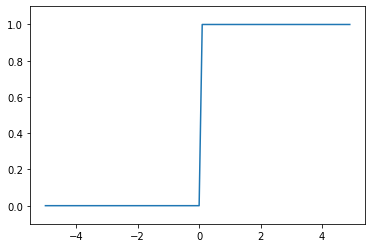

In [11]:
import numpy as np
import matplotlib.pylab as plt

x = np.arange(-5.0, 5.0, 0.1)
y = step_function(x)
plt.plot(x, y)
plt.ylim(-0.1, 1.1) # y축 범위 지정
plt.show()

#### 2.6.4 신경망의 활성화 함수
계단 함수가 아닌 다른 비선형 함수를 사용


- 신경망 활성화 함수의 예
  - 시그모이드(Sigmoid) 함수
  - 하이퍼볼릭 탄젠트(Hyperbolic tangent) 함수
  - 렐루(ReLU) 함수
  - 리키 렐루(Leaky ReLU) 함수
  - 소프트맥스(Softmax) 함수

- 시그모이드(Sigmoid) 함수
  - 입력값을 0~1 사이에서 비선형 형태로 변형해줌
  - 과거에는 많이 사용했으나 심층신경망에서 모델의 깊이가 깊어지면서 '기울기 소실 문제(vanishing gradient problem)'가 발생하여 현재는 잘 사용하지 않음
  - 시그모이드 함수의 수식

 <img src="./02.신경망_기초/02-11.sigmoid.png" width="15%" height="15%">

- 렐루(ReLU) 함수
  - ReLU: Rectified Linear Unit
  - 입력 x가 음수일 때는 0을 출력, 양수일 때는 x를 그대로 출력
  - 학습 속도가 빠르고 기울기 소실 문제가 발생하지 않는 장점이 있음
  - 은닉층에서 많이 사용

 <img src="./02.신경망_기초/02-12.relu.png" width="20%" height="20%">

##### 시그모이드 함수의 구현

In [12]:
import numpy as np

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [13]:
x = np.array([-1.0, 1.0, 2.0])

print(sigmoid(x))

[0.26894142 0.73105858 0.88079708]


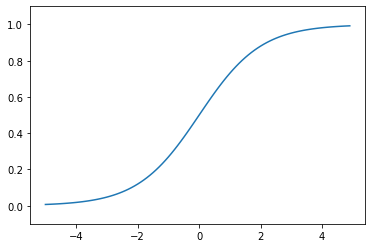

In [14]:
import matplotlib.pylab as plt

x = np.arange(-5.0, 5.0, 0.1)
y = sigmoid(x)
plt.plot(x, y)
plt.ylim(-0.1, 1.1)
plt.show()

##### 렐루 함수의 구현

In [15]:
import numpy as np

def relu(x):
    return np.maximum(0, x)

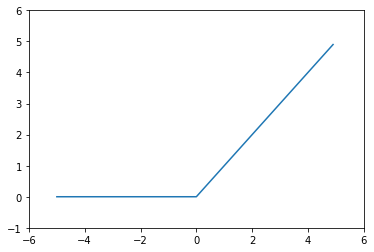

In [16]:
import matplotlib.pylab as plt

x = np.arange(-5.0, 5.0, 0.1)
y = relu(x)
plt.plot(x, y)
plt.xlim(-6, 6)
plt.ylim(-1, 6)
plt.show()

#### 2.6.5 출력층 설계

- 신경망은 분류와 회귀 문제 모두에 이용 가능
  - 분류: 데이터가 어느 클래스에 속하는지 정하는 문제 (이미지 속 동물이 고양이인지, 개인지)
  - 회귀: 수치를 예측하는 문제 (주택 가격 예측)
- 단, 출력층의 활성화 함수가 다름
  - 회귀: 항등 함수
  - 분류: 소프트맥스 함수
- 출력층의 뉴런(노드) 수
  - 문제에 맞게 적절히 정함
  - 분류에서는 분류하고자 하는 클래스 수로 설정
  - 입력 이미지를 숫자 0부터 9 중 하나로 분류하는 문제라면 출력층의 뉴런을 10개로 설정
 

- 항등 함수
  - 입력을 그대로 출력함
  - 입력과 출력이 항상 같다는 의미로 항등이라고 함


- 소프트맥스(Softmax) 함수
  - 입력 신호의 지수 함수를 모든 입력 신호의 지수 함수의 합으로 나눈 것
  - 소프트맥스 함수의 출력은 0에서 1 사이의 실수
  - 소프트맥스 함수 출력의 총합은 1 -> 확률로 해석할 수 있음
 
  <img src="./02.신경망_기초/02-13.softmax.png" width="15%" height="15%">
  
  - n: 출력층의 뉴런 수
  - yk: k번째 출력
 
  <img src="./02.신경망_기초/02-14.softmax-ex.png" width="15%" height="15%">
   
  <img src="./02.신경망_기초/02-15.softmax-y1.png" width="20%" height="20%">
 

##### 소프트맥스 함수의 구현

In [17]:
import numpy as np

def softmax(a):
    c = np.max(a)
    exp_a = np.exp(a-c) # 오버플로우 대책
    sum_exp_a = np.sum(exp_a)
    y = exp_a / sum_exp_a
    
    return y

In [18]:
a = np.array([0.3, 2.9, 4.0])
y = softmax(a)

print(y)
print(np.sum(y))

[0.01821127 0.24519181 0.73659691]
1.0


In [19]:
# 오버플로우 방지가 필요한 이유

a = ([1010, 1000, 900])
print(np.exp(a) / np.sum(np.exp(a)))

[nan nan nan]


<ipython-input-19-f422774da38a>:4: RuntimeWarning: overflow encountered in exp
  print(np.exp(a) / np.sum(np.exp(a)))
<ipython-input-19-f422774da38a>:4: RuntimeWarning: invalid value encountered in true_divide
  print(np.exp(a) / np.sum(np.exp(a)))


- 컴퓨터를 이용한 연산 시 a가 큰 수일 경우 지수 함수 결과가 무한대가 나와버림
- 입력 값 중 최대값을 일괄적으로 뺀 후 계산하는 방법으로 해결
- 이렇게 하더라도 소프트맥스 결과는 동일함


#### 생각해보기
- 위와 같은 방법으로 하더라도 소프트맥스 결과가 동일한 이유는?
- 소프트맥스 함수 식을 이용해서 증명해보자